In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('Training Dataset.csv')
test_df = pd.read_csv('Test Dataset.csv')

# Concatenate the datasets
df = pd.concat([train_df, test_df], ignore_index=True)

# Display the first few rows of the concatenated dataset
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Display basic information about the dataset
dataset_info = df.info()

# Display basic statistics
dataset_description = df.describe(include='all')

# Check for missing values
missing_values = df.isnull().sum()

dataset_info, dataset_description, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


(None,
          Loan_ID Gender Married Dependents Education Self_Employed  \
 count        981    957     978        956       981           926   
 unique       981      2       2          4         2             2   
 top     LP001002   Male     Yes          0  Graduate            No   
 freq           1    775     631        545       763           807   
 mean         NaN    NaN     NaN        NaN       NaN           NaN   
 std          NaN    NaN     NaN        NaN       NaN           NaN   
 min          NaN    NaN     NaN        NaN       NaN           NaN   
 25%          NaN    NaN     NaN        NaN       NaN           NaN   
 50%          NaN    NaN     NaN        NaN       NaN           NaN   
 75%          NaN    NaN     NaN        NaN       NaN           NaN   
 max          NaN    NaN     NaN        NaN       NaN           NaN   
 
         ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 count        981.000000         981.000000  954.000000       

In [3]:
# Fill missing values for categorical columns with mode
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill missing values for numeric columns with median
for column in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[column].fillna(df[column].median(), inplace=True)

# Check if all missing values are handled
missing_values_after_fill = df.isnull().sum()
missing_values_after_fill


C:\Users\adity\AppData\Local\Temp\ipykernel_15308\18599349.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_15308\18599349.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [4]:
# Create a new column for TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Create a new column for Income to Loan Ratio
df['Income_to_Loan_Ratio'] = df['TotalIncome'] / df['LoanAmount']

# Display the first few rows to check new features
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Income_to_Loan_Ratio
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,5849.0,46.420635
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,47.585938
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,45.454545
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,41.175000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,42.553191


In [5]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Apply label encoding to categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Display the first few rows to check encoding
print(df.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       126.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area Loan_Status  TotalIncome  \
0             1.0              2           Y       5849.0   
1             1.0             

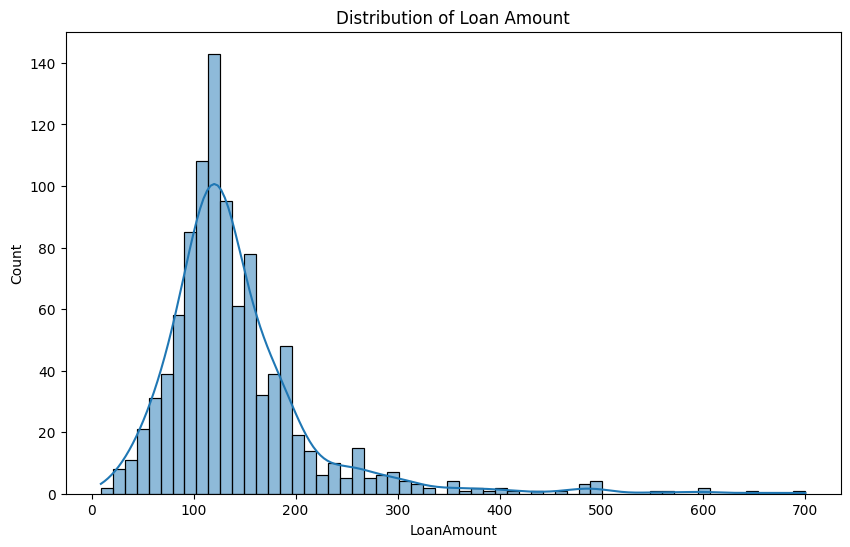

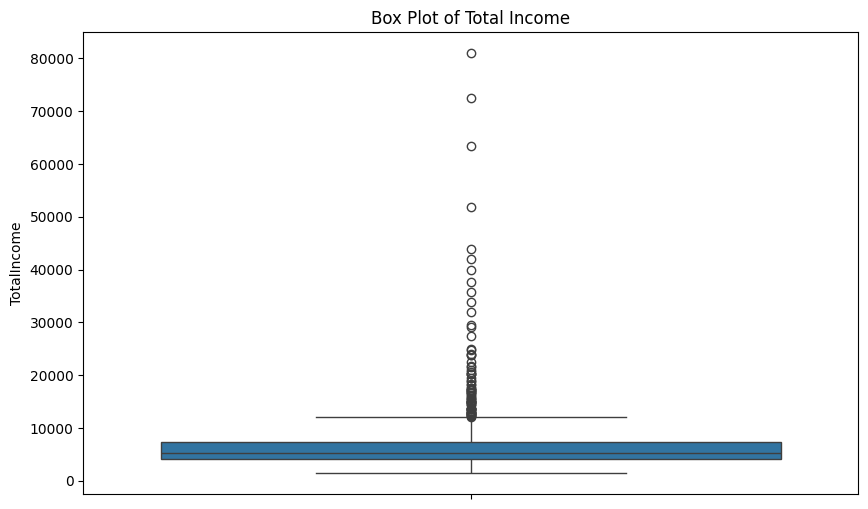

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of LoanAmount
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

# Box plot for TotalIncome
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['TotalIncome'])
plt.title('Box Plot of Total Income')
plt.show()

# Pair plot to see relationships between features
sns.pairplot(df)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
train_df = df[~df['Loan_Status'].isnull()]
test_df = df[df['Loan_Status'].isnull()]

# Separate features and target variable
X = train_df.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)  # Encode target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
